In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd

import matplotlib
import matplotlib.patches as patches
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preview'] = True
plt.rc('font', family='serif', serif=['Times'])

In [6]:
model2nlvr = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 74.25,
    '$\\mathrm{\\textsc{LXMERT}}$': 76.20,
    '$\\mathrm{\\textsc{VisualBERT}}$': 67.00,
    '$\\mathrm{\\textsc{UNITER}_{BASE}}$': 77.87,
}
model2size = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': sum([0, 31]),
    '$\\mathrm{\\textsc{LXMERT}}$': sum([92, 0]),
    '$\\mathrm{\\textsc{VisualBERT}}$': sum([6, 0]),
    '$\\mathrm{\\textsc{UNITER}_{BASE}}$': sum([56, 40]),
}


# Pretraining seed runs
vilbert = {0 : 71.87, 1234 : 71.91, 27 : 71.51, 33 : 72.24, 42 : 72.38, 54 : 72.57, 69 : 71.60, 73 : 71.93, 89 : 72.71, 93 : 71.72}
lxmert = {0 : 71.09, 1234 : 70.76, 27 : 68.87, 33 : 69.40, 42 : 69.07, 54 : 69.51, 69 : 69.69, 73 : 69.26, 89 : 69.64, 93 : 70.19}
visualbert = {0 : 71.82, 1234 : 72.70, 27 : 72.61, 33 : 71.22, 42 : 71.34, 54 : 71.25, 69 : 72.03, 73 : 72.27, 89 : 72.87, 93 : 72.67}
uniter = {0 : 72.05, 1234 : 73.26, 27 : 73.36, 33 : 73.49, 42 : 72.94, 54 : 74.16, 69 : 72.57, 73 : 73.73, 89 : 73.30, 93 : 73.39}
df = pd.DataFrame(data=[vilbert, lxmert, visualbert, uniter], index=['vilbert', 'lxmert', 'visualbert', 'uniter'])

/Users/plz563/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: 
The make_dvi_preview function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


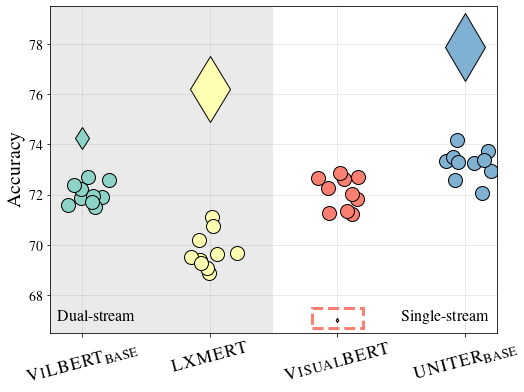

In [95]:
cm = plt.get_cmap('Set3') 
colors = cm.colors

ylim  = [66.5, 79.5]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

ax.axvspan(-0.5, 1.5, facecolor='#999999', alpha=0.2)
ax.text(-0.2, 67, 'Dual-stream', fontsize=16)
ax.text(2.5, 67, 'Single-stream', fontsize=16)

for ix, v in enumerate(list(model2nlvr.values())[:2]):
    ax.plot(ix, v, 'd', markersize=0.5*list(model2size.values())[ix], markeredgecolor='k', color=colors[ix])
for ix, v in enumerate(list(model2nlvr.values())[2:]):
    ax.plot(ix+2, v, 'd', markersize=0.5*list(model2size.values())[ix+2], markeredgecolor='k', color=colors[ix+3])

width=0.8
for ix, v in enumerate([vilbert, lxmert]):
    for e in v.values():
        ax.plot(ix + np.random.rand(1)[0]/2*width-width/5, e, 'o', markersize=0.5*28, markeredgecolor='k', color=colors[ix])
for ix, v in enumerate([visualbert, uniter]):
    for e in v.values():
        ax.plot(ix+2 + np.random.rand(1)[0]/2*width-width/5, e, 'o', markersize=0.5*28, markeredgecolor='k', color=colors[ix+3])

ax.set_ylim(ylim)
ax.set_xlim(-0.25, 3.25)

ax.set_xticks([x for x in range(len(model2nlvr))])
ax.set_xticklabels(model2nlvr.keys(), fontsize=18, rotation=15)

ax.set_ylabel("Accuracy", fontsize=20)
ax.tick_params(axis="y", labelsize=14)

ax.grid(color='gray', alpha=0.2)
# ax2.grid()

# Create a Rectangle patch
rect = patches.Rectangle((1.8, 66.7), .40, .80, linewidth=3, linestyle='--', edgecolor=colors[3], facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.savefig('comparison_mini_new2.pdf', bbox_inches='tight')